In [1]:
# Importing Libraries 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
roc_auc_score, roc_curve, plot_roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 

In [2]:
# Reading the Dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(10)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### EDA 

In [3]:
# Checking for NaN
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
# Replacing NaN values with column mean
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [5]:
df.isna().sum() 

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
# CHecking for Null Values
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

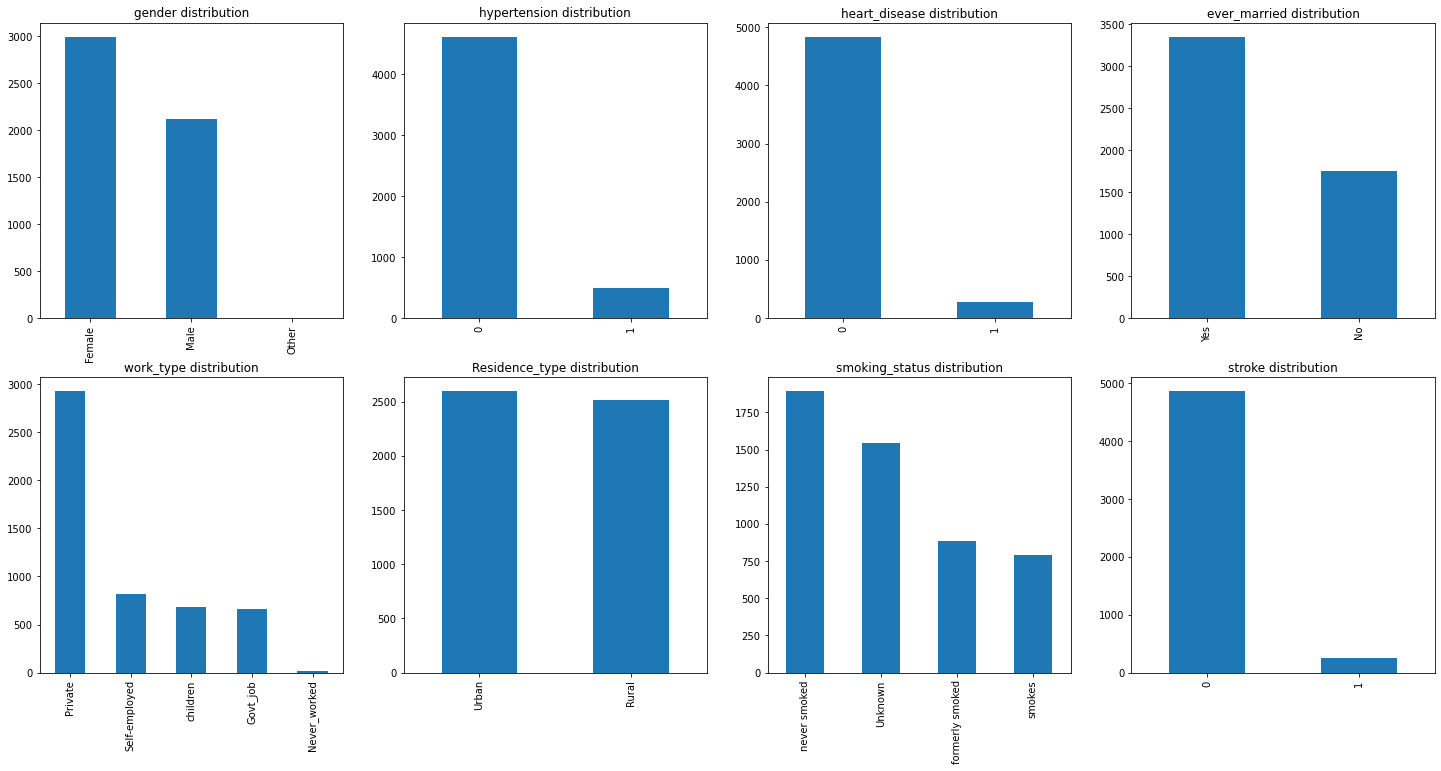

In [7]:
# Plotting Categorical Columns
categorical_columns = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']
j = 1
plt.figure(figsize=(25,25))
for i in categorical_columns:
 plt.subplot(4,4,j)
 df[i].value_counts().plot(kind='bar')
 plt.title('%s distribution' %i)

 j += 1


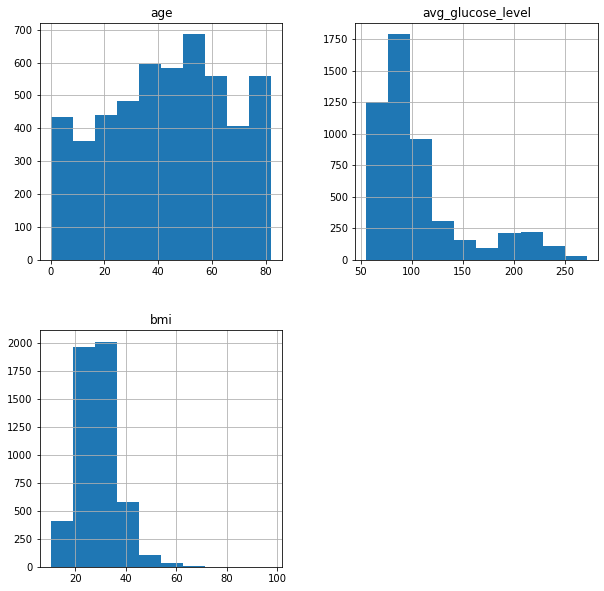

In [8]:
# Plotting Numeric Columns
numeric_col = ['age','avg_glucose_level','bmi']
df[numeric_col].hist(figsize=(10,10))
plt.show()

<AxesSubplot:>

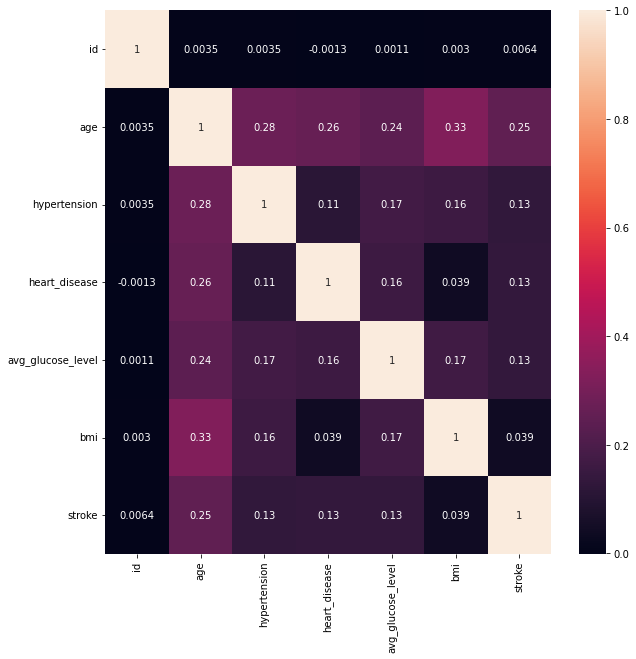

In [9]:
# Correlation Matrix to check if there is any correlation between predictor variables
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

*From the correlation matrix, we dont see any strong correlation between predictor variables. To reiterate this, lets plot a pairplot*

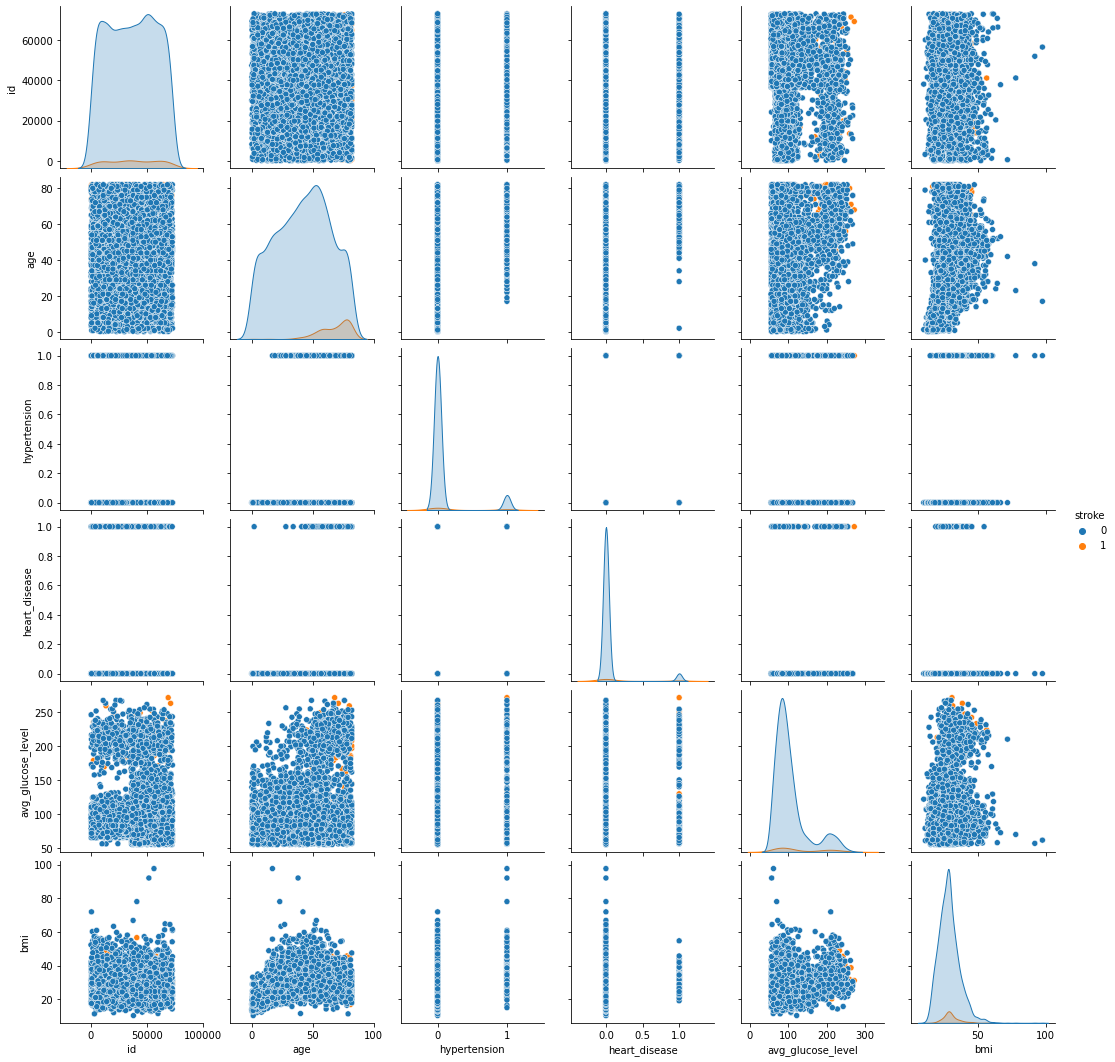

<Figure size 720x720 with 0 Axes>

In [10]:
# Plotting a pairplot
sns.pairplot(df, hue="stroke")
plt.figure(figsize=(10,10))
plt.show()

*Again we do not see any correlation between predictor variables*

### Dataset Preparation for Modeling 

In [11]:
# Label Encoding 
label_encoder = LabelEncoder()
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])

df = pd.get_dummies(df,columns=['gender','work_type','smoking_status'])

df.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,...,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,1,1,228.69,36.600000,1,0,...,0,0,0,1,0,0,0,1,0,0
1,51676,61.0,0,0,1,0,202.21,28.893237,1,1,...,0,0,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,1,0,105.92,32.500000,1,0,...,0,0,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,1,1,171.23,34.400000,1,1,...,0,0,0,1,0,0,0,0,0,1
4,1665,79.0,1,0,1,0,174.12,24.000000,1,1,...,0,0,0,0,1,0,0,0,1,0


In [12]:
df = df.drop('id',axis=1)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
ever_married,5110.0,0.656164,0.475034,0.00,0.000,1.000,1.00,1.00
Residence_type,5110.0,0.508023,0.499985,0.00,0.000,1.000,1.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00
gender_Female,5110.0,0.585910,0.492612,0.00,0.000,1.000,1.00,1.00
gender_Male,5110.0,0.413894,0.492578,0.00,0.000,0.000,1.00,1.00


*As we can see from the description above, there is a wide difference between the range of variables, hence we need to do feature scaling*

*For feature scaling we used Normalization over standardization because the distribution of our variables are not gaussian in nature and hence normalization seemed to be a fair choice. Also we need to perform feature scaling because the ML models we plan to use for classification use distance for classification and hence feature scaling is important*

In [13]:
#Normalizing
scaler = MinMaxScaler()
#std=StandardScaler() # For standardization
df[['age','bmi','avg_glucose_level']] = scaler.fit_transform(df[['age','bmi','avg_glucose_level']])


In [14]:
df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0,1,1,1,0.801265,0.301260,1,0,1,0,0,0,1,0,0,0,1,0,0
1,0.743652,0,0,1,0,0.679023,0.212981,1,1,0,0,0,0,0,1,0,0,0,1,0
2,0.975586,0,1,1,0,0.234512,0.254296,1,0,1,0,0,0,1,0,0,0,0,1,0
3,0.597168,0,0,1,1,0.536008,0.276060,1,1,0,0,0,0,1,0,0,0,0,0,1
4,0.963379,1,0,1,0,0.549349,0.156930,1,1,0,0,0,0,0,1,0,0,0,1,0


In [15]:
# SPlitting Data into Test and Train
x_data = df.drop("stroke" , axis = 1)
y_data = df["stroke"]
x_train, x_test, y_train , y_test = train_test_split(x_data,y_data, test_size=0.20 , random_state=42)

*Since we have an imbalanced dataset where negative class is more than positive, we need to balance our training set so that our models do not have bias towards one class. For this purpose we are oversampling the train dataset using SMOTE*

In [16]:
#Oversampling the dataset
ros = SMOTE()
#X = x_train.iloc[:,:-1]
#y = y_train.iloc[:,-1]
x_ros, y_ros = ros.fit_resample(x_train, y_train)
#df_ros['stroke']=y_ros

### Functions to Visualize Metrics

In [17]:
def plot_auc(t_y, p_y):
    plt.figure(figsize=(5,5))
    fpr, tpr, thresholds = roc_curve(t_y,p_y)
    auc_ans = auc(fpr, tpr)
    plt.plot(fpr,tpr, label = ('AUC: %0.3f '%auc_ans),color='red',lw=2)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    pass

def plot_precision_recall_curve(t_y, p_y):
    plt.figure(figsize=(5,5))
    precision, recall,threshold = precision_recall_curve(t_y,p_y)
    auc_prec = auc(recall, precision)
    plt.plot(recall,precision,label=('AUC: %0.3f'%auc_prec))
    plt.title('precision recall curve')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.legend()
    plt.show()
    return precision,recall

def ConfusionMatrix(t_y,p_y):
    cm = confusion_matrix(t_y,p_y)
    sns.heatmap(cm, annot=True,fmt='g')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    pass



### Models

In [46]:
model_comparision = {}

#### a) Logistic Regression

In [47]:
logreg = LogisticRegression(random_state=0)
logreg.fit(x_ros, y_ros)

y_pred = logreg.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)

perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

model_comparision['Logistic Regression'] = [perc_score, rec_score, f1score]

Testing Accuracy:  0.7827788649706457
Precision: 0.180
Recall: 0.726
F-measure: 0.288


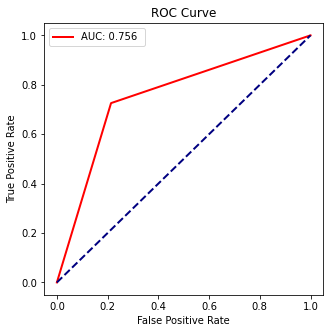

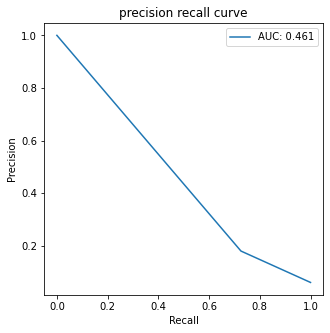

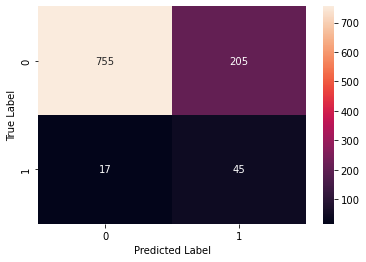

In [48]:
plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)


#### b) Random Forest

In [49]:
rf = RandomForestClassifier(n_estimators = 150, criterion= 'gini', random_state = 0,max_depth=90,max_leaf_nodes=120)
rf.fit(x_ros, y_ros)
y_pred = rf.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)
perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

model_comparision['Random Forest'] = [perc_score, rec_score, f1score]

Testing Accuracy:  0.7935420743639922
Precision: 0.160
Recall: 0.565
F-measure: 0.249


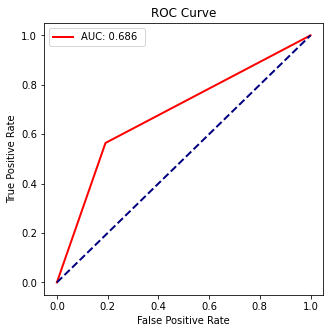

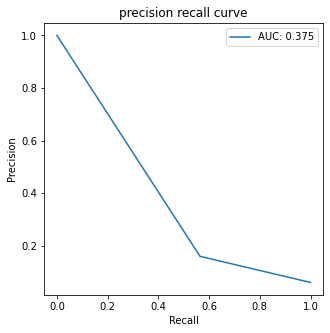

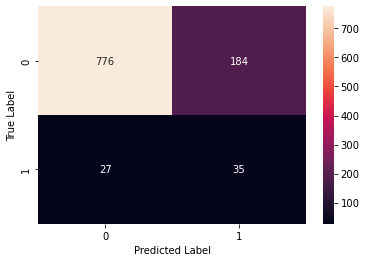

In [50]:
plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

#### c) Decision Tree

In [51]:
dt =DecisionTreeClassifier(max_features=14 , max_depth=12, criterion= 'gini')
dt.fit(x_ros, y_ros)
y_pred = dt.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)
perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

model_comparision['Decision Tree'] = [perc_score, rec_score, f1score]


Testing Accuracy:  0.7661448140900196
Precision: 0.136
Recall: 0.532
F-measure: 0.216


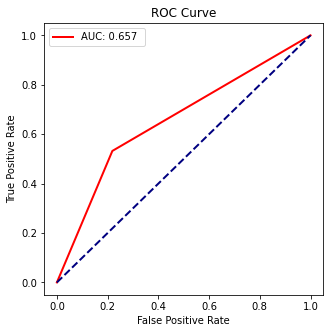

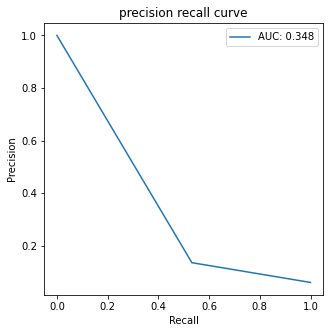

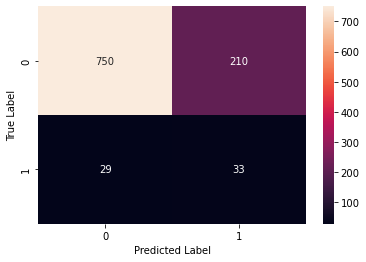

In [52]:
plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

#### d) XGBBoost

In [53]:
xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.05)
xgb.fit(x_ros, y_ros)
y_pred = xgb.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)
perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

model_comparision['XGB'] = [perc_score, rec_score, f1score]

Testing Accuracy:  0.8307240704500979
Precision: 0.179
Recall: 0.500
F-measure: 0.264


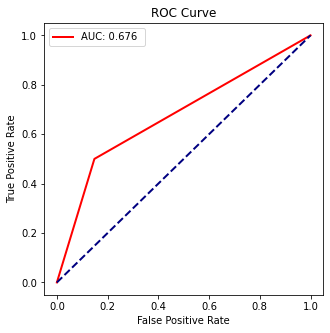

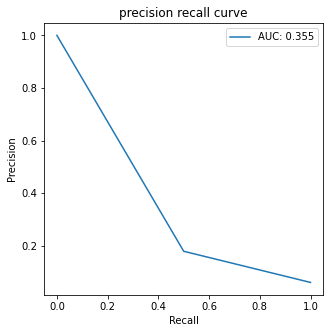

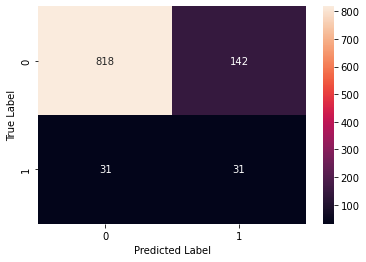

In [54]:
plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

#### e) SVM

In [55]:
svc = SVC(C=100, gamma=1000 ,probability= True, kernel='rbf')
svc.fit(x_ros, y_ros)
y_pred = svc.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)
perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

model_comparision['SVM'] = [perc_score, rec_score, f1score]

Testing Accuracy:  0.9119373776908023
Precision: 0.062
Recall: 0.032
F-measure: 0.043


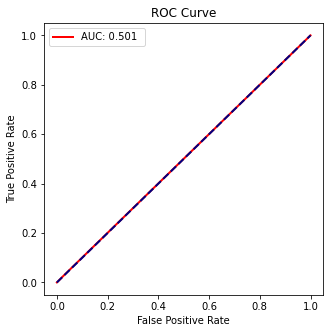

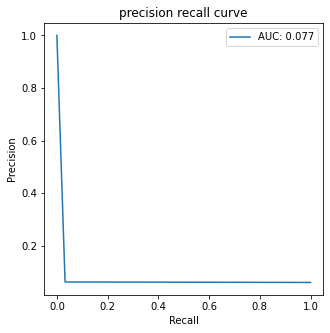

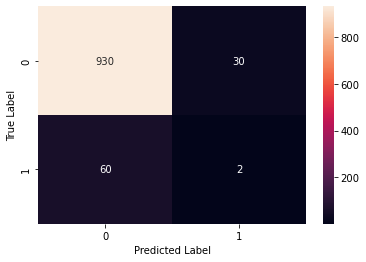

In [56]:
plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

In [57]:
model_comparison_df = pd.DataFrame.from_dict(model_comparision).T
model_comparison_df.columns = ['Precision', 'Recall', 'F1']
model_comparison_df = model_comparison_df.sort_values('Recall', ascending=False)
model_comparison_df.style.background_gradient(cmap='Blues')

,Precision,Recall,F1
Logistic Regression,0.180000,0.725806,0.288462
Random Forest,0.159817,0.564516,0.249110
Decision Tree,0.135802,0.532258,0.216393
XGB,0.179191,0.500000,0.263830
SVM,0.062500,0.032258,0.042553


### Tuning 

*Finding best parameters for our models using gridsearch*

*For our dataset, accuracy is not a good metric since our dataset is imbalanced. Hence we need to look at precision, recall and F1 score. In stroke analysis the cost of false negatives is quite high, for example, if the patient is at high risk of stroke but no medication is given to them because the model classified them as negative ?* 

In [28]:
param_grid = {'C':[0.1,1,10,100,1000], 'penalty':["l1","l2"]}
model = LogisticRegression()
grid = GridSearchCV(model,param_grid, scoring ='recall' ,cv=5)
print("Searching for best hyperparameters for Logistic Regression...")
grid.fit(x_ros, y_ros)
best_accuracy = grid.best_score_
best_param = grid.best_params_
print('{}:\n Best Score : {:.2f}%'.format(i,best_accuracy*100))
print('Best Parameters : ',best_param)
print('----------------')

Searching for best hyperparameters for Logistic Regression...
stroke:
 Best Score : 86.03%
Best Parameters :  {'C': 0.1, 'penalty': 'l2'}
----------------


In [29]:
param_grid = {'max_features':[5,6,10,12,14,18,20],'max_depth':[6,10,12,14,18,20] ,'criterion':['gini','entropy'],'random_state':[0]}
model = DecisionTreeClassifier()
scoring = ['f1','recall']
grid = GridSearchCV(model,param_grid, scoring ='recall',cv=5)
#grid = GridSearchCV(model,param_grid, scoring = 'recall',cv=5)
print("Searching for best hyperparameters for Decision Tree...")
grid.fit(x_ros, y_ros)
best_accuracy = grid.best_score_
best_param = grid.best_params_
print('{}:\n Best Score : {:.2f}%'.format(i,best_accuracy*100))
print('Best Parameters : ',best_param)
print('----------------')

Searching for best hyperparameters for Decision Tree...
stroke:
 Best Score : 94.72%
Best Parameters :  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 18, 'random_state': 0}
----------------


In [30]:
param_grid = {'n_estimators':[100,150,200],'max_depth': [60,90,100,120],'max_leaf_nodes':[60, 80, 100, 120],'criterion':['gini','entropy'],'random_state':[0]}
model = RandomForestClassifier()
grid = GridSearchCV(model,param_grid, scoring = 'recall',cv=5)
print("Searching for best hyperparameters for Random Forrest...")
grid.fit(x_ros, y_ros)
best_accuracy = grid.best_score_
best_param = grid.best_params_
print('{}:\n Best Score : {:.2f}%'.format(i,best_accuracy*100))
print('Best Parameters : ',best_param)
print('----------------')

Searching for best hyperparameters for Random Forrest...
stroke:
 Best Score : 95.59%
Best Parameters :  {'criterion': 'entropy', 'max_depth': 60, 'max_leaf_nodes': 120, 'n_estimators': 150, 'random_state': 0}
----------------


In [31]:
param_grid = {'learning_rate': [0.01,0.05, 0.1, 0.5, 1], 'eval_metric': ['error']}
model = XGBClassifier()
grid = GridSearchCV(model,param_grid, scoring = 'recall',cv=5)
print("Searching for best hyperparameters for XGBoost...")
grid.fit(x_ros, y_ros)
best_accuracy = grid.best_score_
best_param = grid.best_params_
print('{}:\n Best Score : {:.2f}%'.format(i,best_accuracy*100))
print('Best Parameters : ',best_param)
print('----------------')

Searching for best hyperparameters for XGBoost...
stroke:
 Best Score : 95.72%
Best Parameters :  {'eval_metric': 'error', 'learning_rate': 0.05}
----------------


In [32]:
param_grid = {'C':[0.1,1,10], 'gamma':[1, 0.1, 0.01,'auto'],'kernel':[ 'rbf','sigmoid','poly'],'random_state':[0]}
model = SVC(probability=True)
grid = GridSearchCV(model,param_grid, scoring = 'recall',cv=5)
print("Searching for best hyperparameters for SVM...")
grid.fit(x_ros, y_ros)
best_accuracy = grid.best_score_
best_param = grid.best_params_
print('{}:\n Best Score : {:.2f}%'.format(i,best_accuracy*100))
print('Best Parameters : ',best_param)
print('----------------')

Searching for best hyperparameters for SVM...
stroke:
 Best Score : 94.51%
Best Parameters :  {'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid', 'random_state': 0}
----------------


### Tuned Models

In [35]:
model_compare = {}

Testing Accuracy:  0.7622309197651663
Precision: 0.166
Recall: 0.726
F-measure: 0.270


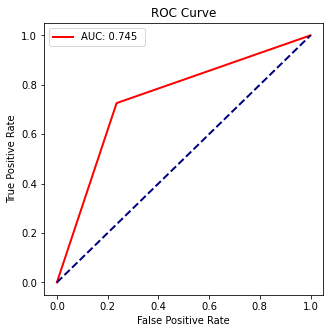

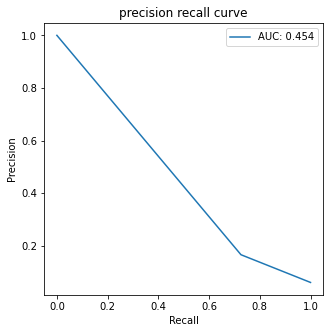

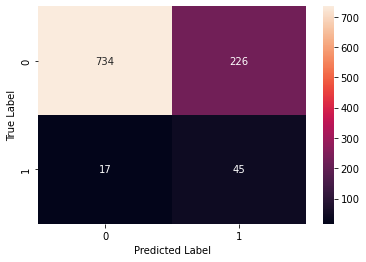

In [36]:
logreg = LogisticRegression(C=0.1,penalty='l2',random_state=0)
logreg.fit(x_ros, y_ros)
y_pred = logreg.predict(x_test)

acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)

perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

model_compare['Logistic Regression'] = [perc_score, rec_score, f1score]


Testing Accuracy:  0.7397260273972602
Precision: 0.141
Recall: 0.645
F-measure: 0.231


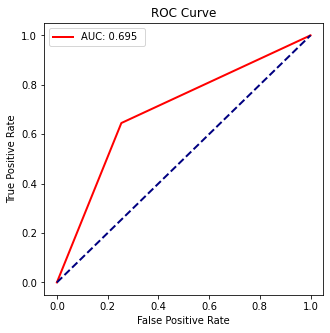

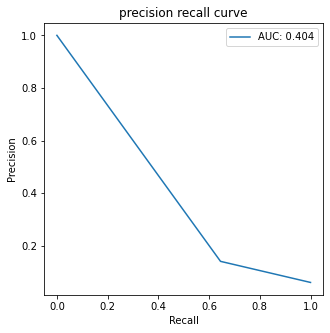

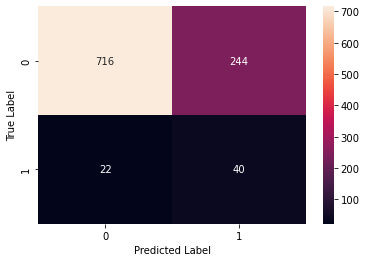

In [38]:
DT = DecisionTreeClassifier(max_depth=10,max_features=18,criterion='entropy',random_state=0)
DT.fit(x_ros, y_ros)
y_pred = DT.predict(x_test)

acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)

perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

model_compare['Decision Tree'] = [perc_score, rec_score, f1score]

Testing Accuracy:  0.7818003913894325
Precision: 0.152
Recall: 0.565
F-measure: 0.239


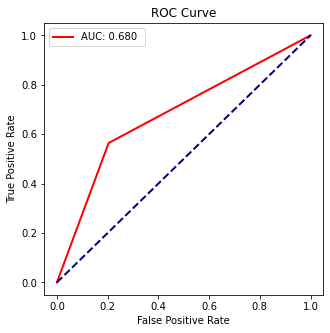

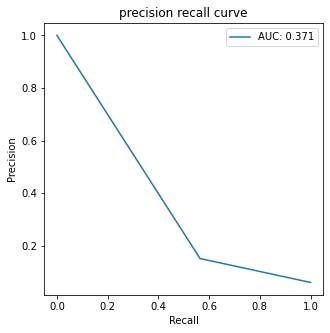

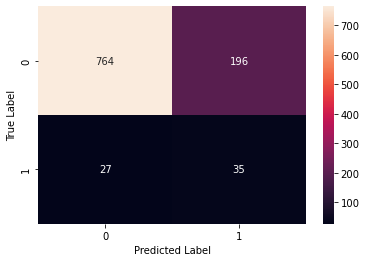

In [39]:
rf = RandomForestClassifier(max_depth = 60, max_leaf_nodes = 120,n_estimators=150,criterion='entropy',random_state=0)
rf.fit(x_ros, y_ros)
y_pred = rf.predict(x_test)

acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)

perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

model_compare['Random Forest'] = [perc_score, rec_score, f1score]

Testing Accuracy:  0.8307240704500979
Precision: 0.179
Recall: 0.500
F-measure: 0.264


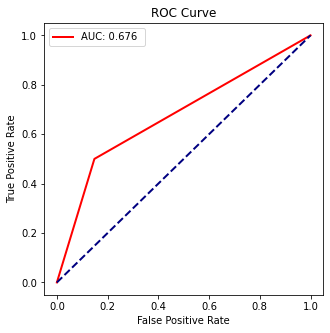

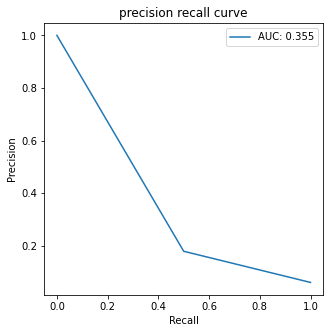

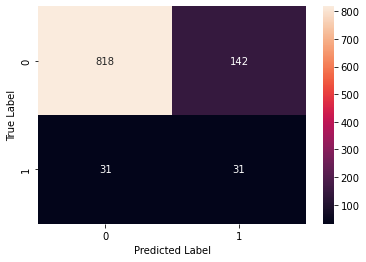

In [40]:
xb = XGBClassifier(learning_rate= 0.05, eval_metric= 'error')
xb.fit(x_ros, y_ros)
y_pred = xb.predict(x_test)

acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)

perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

model_compare['XGB'] = [perc_score, rec_score, f1score]


Testing Accuracy:  0.3972602739726027
Precision: 0.090
Recall: 0.984
F-measure: 0.165


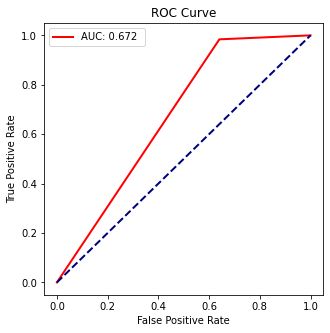

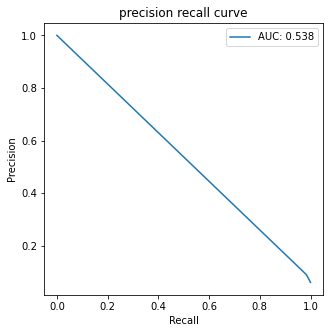

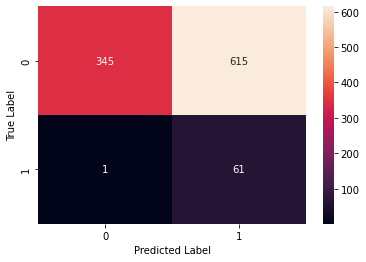

In [41]:


svm = SVC(probability=True, C =0.1, gamma = 0.01, kernel = 'sigmoid', random_state = 0 )
svm.fit(x_ros, y_ros)
y_pred = svm.predict(x_test)

acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)

perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

model_compare['SVM'] = [perc_score, rec_score, f1score]

In [45]:
model_compare_df = pd.DataFrame.from_dict(model_compare).T
model_compare_df.columns = ['Precision', 'Recall', 'F1']
model_compare_df = model_compare_df.sort_values('Recall', ascending=False)
model_compare_df.style.background_gradient(cmap='Reds')

,Precision,Recall,F1
SVM,0.090237,0.983871,0.165312
Decision Tree,0.140845,0.645161,0.231214
Random Forest,0.151515,0.564516,0.238908
XGB,0.179191,0.500000,0.263830
Logistic Regression,0.136054,0.322581,0.191388


*After model tuning we can see that SVM worked best if we consider Recall as our scoring metric*